<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Classification With Neural Networks***

###**Tenggat Waktu: 4 Desember 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **4 Desember 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


**Catatan:**
Harap jangan menunda - nunda mengerjakan karena Tutorial 7 kali ini cukup banyak pertanyaan yang harus dijawab.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

# Teori

Neural Network (NN) merupakan suatu algoritma machine learning yang memiliki cara kerja menyerupai neuron pada otak manusia. Multi Layer Perceptron (MLP) merupakan salah satu jenis NN yang terdiri dari perceptron yang disusun menjadi beberapa layer. Contoh neuron pada NN dapat dilihat pada gambar berikut:

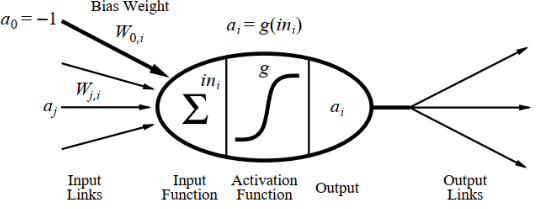

Pada gambar di atas, dapat dilihat bahwa pada setiap perceptron terdapat weight atau bobot untuk setiap input. Setiap input lalu dikalikan dengan bobot dan dijumlahkan seluruhnya. Selain itu, terdapat pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan dilakukan, hasil penjumlahan dimasukkan ke activation function yang akan menghasilkan output. Terdapat beberapa jenis activation function, antara lain: TanH, ReLU, dan lain-lain yang dapat dilihat pada gambar di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Formula untuk melakukan update bobot/weight dapat dilihat pada rumus berikut:

image.png

Penjelasan variabel pada rumus:
- wi merupakan weight untuk input ke-i
- xi merupakan input ke-i
- η merupakan learning rate
- t merupakan target output
- o merupakan output dari perceptron saat ini

Nilai w yang dicari merupakan nilai yang membuat selisih antara variabel t dan o menjadi sekecil mungkin.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide mata kuliah Data Mining 2019

# Klasifikasi dengan Neural Network

## Eksplorasi Dataset

Pada tutorial ini, dataset yang digunakan adalah dataset Iris. Dataset Iris adalah dataset multivariat yang diperkenalkan oleh Ronald Fisher pada tahun 1936 melalui penelitiannya yang berjudul "***The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis***". 
  
Dataset ini berisi informasi tentang komponen bunga serta spesiesnya. Dataset ini berisi 50 baris sampel dari setiap spesies. Total terdapat 3 buah spesies dengan masing - masing berjumlah 50 baris data. Dataset ini berisi kolom sebagai berikut:

1.  **sepal_length** (Dalam unit centimeter, float)
2.  **sepal_width** (Dalam unit centimeter, float)
3.  **petal_length** (Dalam unit centimeter, float)
4.  **petal_width** (Dalam unit centimeter, float)
5.  **species** (3 Kelas, string)

Mari kita lihat apa saja informasi yang bisa kita dapatkan dari dataset ini!

In [ ]:
# Import library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates

Dataset yang digunakan diambil dari UCI machine learning. Pastikan laptop Anda terhubung dengan internet. Kemudian, karena dataset ini tidak memiliki header, maka header harus ditambahkan secara manual

In [ ]:
#Define the col names
colnames=["sepal_length", "sepal_width","petal_length","petal_width", "species"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
dataset.head()

In [ ]:
dataset.groupby('species').size()

Seperti yang terlihat pada output dari cell di atas, terlihat bahwa dataset memiliki 3 buath kelas yang masing - masing berjumlah sama. Sehingga bisa dikatakan dataset ini  tidak memiliki ketimpangan data

Setelah mendapatkan informasi terkait jumlah species, saatnya melakukan eksplorasi lebih jauh

In [ ]:
dataset.describe()

In [ ]:
# Visualisasi dengan Pair Plotting

sns.pairplot(data=dataset, vars=('sepal_length','sepal_width','petal_length','petal_width'), hue='species')

In [ ]:
# Visualisasi dengan Bar Chart

n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(dataset['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(dataset['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(dataset['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(dataset['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

In [ ]:
# Visualisasi dengan Boxplot

fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = dataset, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = dataset,  order = cn, ax = axs[1,1]);

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

In [ ]:
# Visualisasi Menggunakan Heatmap
corrmat = dataset.corr()
sns.heatmap(corrmat, annot = True, square = True);

In [ ]:
# Visualisasi Menggunakan Parallel Coordinate
parallel_coordinates(dataset, "species", color = ['red', 'green', 'blue']);

Setelah eksplorasi data selesai, sekarang saatnya membuat Classifier untuk Neural Network yang kita gunakan untuk dataset iris ini. Pembentukan classifier dilakukan pada section berikutnya

## Preprocessing Data

Pada bagian ini akan dilakukan preprocessing data pada dataset iris. Preprocessing melibatkan:
- Normalisasi Dataset
- Variable Encoding
- Pemisahan data menjadi X_train, X_test, y_train, dan y_test

Hal ini diperlukan agar Neural Network dapat menerima data dengan format yang sesuai ekspektasi algoritma tersebut,

### Pertanyaan A.1
Berdasarkan dataframe yang digunakan, silakan Anda lakukan normalisasi dataframe tersebut
menggunakan jenis normalisasi Min-Max. Normalisasi dilakukan untuk semua kolom, kecuali kolom species.

In [ ]:
# Jawaban A.1
# TODO: Tuliskan kode disini (Ganti None dengan jawaban)
dataset_norm = None

In [ ]:
# Menampilkan 10 baris sampel pertama yang sudah dinormalisasi
dataset_norm.head(n=10)

### Pertanyaan A.2
Silakan lakukan penggantian informasi species pada data sehingga yang awalnya berupa string menjadi bentuk integer.
Ikuti aturan konversi berikut:

Iris-setosa -> 1  
Iris-versicolor -> 2  
Iris-virginica -> 3

Kemudian tampilkan 10 baris data pertama

In [ ]:
# Jawaban A.2
# TODO: Tuliskan kode disini

Berikut ini adalah ekspektasi Jawaban Pertanyaan A.1 dan A.2 sebelum melanjutkan ke tahap selanjutnya. Harap periksa kembali sebelum melanjutkan agar tidak terjadi kesalahan di tahap berikutnya
  

<img src="https://i.ibb.co/Cmwr5fT/Screen-Shot-2021-11-24-at-13-06-25.png" alt="Fasilkom UI" width="500"/>

In [ ]:
from sklearn.model_selection import train_test_split

# Membentuk 4 variabel X_train, X_test, y_train, dan y_test

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

## Klasifikasi dengan Neural Network

Pada bagian ini kita akan melakukanklasifikasi pada dataset Iris menggunakan Neural Network menggunakan MLPClassifier pada Scikit-Learn. Pada kasus klasifikasi, kasus utama yang akan kita selesaikan adalah:
  

**Prediksi jenis species pada dataset Iris**
  

Catatan: Neural network membutuhkan data yang seluruhnya berisi data numerik, kemudian karena dataset yang kita gunakan tidak semuanya berisi data numerik, maka perlu dilakukan penyesuaian. **Jadi harap selesaikan terlebih dulu pertanyaan A.1 & A.2 sebelum melanjutkan ke tahap ini**

### Pembentukan Classifier & Training

Seperti pada classifier yang telah dipelajari sebelumnya (SVM, dan lainnya), MLPClassifier juga memiliki konfigurasi berupa hyperparameter yang bisa dikustomisasi sesuai kebutuhan.

Informasi lebih lanjut terkait parameter, bisa dilihat disini:  
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [ ]:
classifier.fit(X_train, y_train)

### Evaluasi
Evaluasi menggunakan beberapa metrik evaluasi untuk mengetahui seberapa baik performa yang didapatkan.  
  
Mencari tahu bagaimana hasil prediksi yang dihasilkan oleh MLPClassifier.
Hasil yang dikembalikan adalah berupa array yang berisi angka dengan rentang [1,3], dimana setiap angka merepresentasikan berikut:  

*   1 -> Iris-setosa
*   2 -> Iris-versicolor
*   3 -> Iris-virginica

Prediksi menggunakan dataframe yang digunakan untuk testing yang secara keseluruhan berjumlah 30% dari data

In [ ]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

#### Fungsi Evaluasi (Klasifikasi)
Fungsi ini dapat digunakan kembali jika Anda memerlukannya untuk menjawab pertanyaan atau bereksperimen.

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

In [ ]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier, prediction)

Hasil evaluasi yang didapatkan sudah sangat baik. Hasil didapatkan akurasi sebesar 93%. Eits, tapi tunggu dulu, hasil ini bisa berubah lho tergantung bagaimana konfigurasi hyperparameter (atau yang akrab disebut dengan *Hyperparameter tuning*) yang Anda lakukan

### Pertanyaan A.3

Lakukan hyperparameter tuning pada MLPClassifier dengan spesifikasi sebagai berikut:  
*   Solver: SGD (Stochastic Gradient Descent) 
*   Activation Function: ReLU
*   Ealy Stopping: True
*   Learning Rate: Invscaling
*   Learning Rate Init: 1e-5

Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [ ]:
# Silakan jelaskan di sini untuk menjawab pertanyaan A.3

### Pertanyaan A.4

Lakukan hal yang sama dengan pertanyaan B.1 namun dengan kondisi berikut: 
*   Solver: Adam   
  
Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [ ]:
# Silakan jelaskan di sini untuk menjawab pertanyaan A.4

### Evaluasi dengan Classifier Lain
Mari kita lihat bagaimana performa Neural Network jika dibandingkan dengan classifier lain

#### Decision Tree (Gini & Entropy)
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Decision Tree. Kali ini menggunakan variasi Gini & Entropy untuk Decision Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
prediction_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
prediction_dt_entropy = classifier_dt_entropy.predict(X_test)

In [ ]:
# Evaluasi Varian Gini
evaluate_classifier_performance(classifier_dt_gini, prediction_dt)

In [ ]:
# Evaluasi Varian Entropy
evaluate_classifier_performance(classifier_dt_entropy, prediction_dt)

In [ ]:
# Decision Tree (Varian Gini)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_gini, feature_names = fn, class_names = cn, filled = True);

In [ ]:
# Decision Tree (Varian Entropy)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_entropy, feature_names = fn, class_names = cn, filled = True);

#### KNN
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
evaluate_classifier_performance(knn, knn_pred)

#### Naive Bayes
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

In [ ]:
evaluate_classifier_performance(bayes, bayes_pred)

#### SVM
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [ ]:
evaluate_classifier_performance(svm, svm_pred)

# Pertanyaan Bagian B

Pertanyaan A adalah pertanyaan yang disematkan di tengah - tengah tutorial. Pertanyaan B adalah pertanyaan diluar tutorial. Pada bagian ini Anda diharuskan menerepkan membuat model Neural Network untuk kasus klasifikasi

### Penjelasan Dataset

Dataset yang digunakan adalah dataset Perubahan berat badan, kalori, dan pola olahraga pada tahun 2018

Penjelesan atribut:
*   **date** : Date of observations.
*   **stone, pounds, ounces** : measured weight
*   **weight_oz** : Total weight in ounces
*   **calories** : Approximate calories consumed on that date
*   **calsperoz** : calories per ounce - calories for that day divided by weight in ounces
*   **five_donuts** : day where main meal was bag of five jam donuts, 1 = TRUE, 0 = FALSE
*   **walk** : day included at least one brisk walk of over 20 minutes, 1 = TRUE, 0 = FALSE
*   **run**: day included at one short run of 2.5 miles, 1 = TRUE, 0 = FALSE
*   **wine** : day finished with at least one large glass of wine when not accompanied by other fluids, 1 = TRUE, 0 = FALSE
*   **prot** : day involved what would be considered a high protein diet, 1 = TRUE, 0 = FALSE
*   **weight** : signifies day during period of weight-based exercise; includes rest days as part of period, 1 = TRUE, 0 = FALSE
*   **change** : change in weight in oz

In [ ]:
# Import Dataset
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KChrqfvQEiQmEPu1171eEbG7LOtrxbA6' -O diet_data.csv

### Pertanyaan B.1
Menggunakan dataset yang diberikan (**diet_data.csv**) Silakan lakukan pemodelan klasifikasi menggunakan **MLPClassifier** untuk memprediksi kolom **change**.  
  
Dikarenakan kolom change masih berupa numerik, silakan ubah terlebih dahulu mengikuti ketentuan berikut:  
*   Jika change bernilai negatif (Misal -30.0), maka ubah menjadi angka **2**
*   Jika change bernilai positif (Misal 8.0), maka ubah menjadi angka **1**
*   Jika change bernilai nol (0.0), maka ubah menjadi angka **0**
*   Train : Test data memiliki perbandingan 70 : 30
*   Random state: 2021

Jawaban harus meliputi:  
1.   EDA (Exploratory Data Analysis)
2.   Data Preprocessing
3.   Pembentukan classifier dengan MLPClassifier
4.   Evaluasi menggunakan MLPClassifier (minimal mencakup Akurasi, Precision, Recall, dan F1)
5.   Evaluasi dan perbandingan menggunakan classifier lain (Minimal 3 classifier)




In [ ]:
# Implementasi Pertanyaan B.1

### Pertanyaan B.2
1. Pada rumus untuk melakukan update terhadap weight/bobot, apabila nilai variabel o lebih besar daripada t, apakah nilai weight setelah di-update lebih besar daripada nilai sebelum di-update? Jelaskan alasannya.
2. Dari jawaban yang Anda dapatkan dari B.1, apakah MLP lebih baik daripada classifier lain yang Anda gunakan? Mengapa hal tersebut bisa terjadi? Apa kesimpulan Anda ?

In [ ]:
 # Jawaban Pertanyaan B.2